# Final Project: Loan Cancellation before Maturity Date


#### Video Presentation 

Youtube link: https://www.youtube.com/watch?v=VO8OmhD_LSA


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
#from graphviz import Source
from IPython.display import display
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#grid search
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

import scikitplot as skplt


#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings("ignore")

## Collect Inital Data

In [3]:
# import dataset
df = pd.read_csv("data/data.csv")
df.head()

,Cancelled,Loan_Num,Accepted_Date,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,AmtFin,FinChg,...,Borrower_RegisteredForEForms,Borrower_DateRegisteredForEForms,Borrower_RegisteredForCancellationWarning,Borrower_DATERegisteredForCancellationWarning,Borrower_Classification,Borrower_SubTerm,Risk_Score,NoticeOfIntentToCancelDate,BankruptcyFlag,RecurringACH_TF
0,0,2A1D1E6B-1850-4D39-952F-893FA4BF7979,1/6/2015,0.0,0.00,0.0,2078.00,737.00,1341.00,113.94,...,0,NaN,1,1/12/2015,Services,General Other,NaN,NaN,NaN,0
1,0,F67191BC-B396-4476-9E59-3A679EA19DB7,1/23/2015,0.0,0.00,0.0,12033.18,3167.00,8866.18,438.52,...,0,NaN,1,9/2/2014,Real Estate,General Other,NaN,NaN,NaN,0
2,0,A814D45F-C3CF-4C66-B052-E0DE6AB6FFF5,1/23/2015,0.0,0.00,0.0,13650.94,3655.73,9995.21,652.49,...,0,NaN,1,2/13/2015,Transportation,Trucking,NaN,NaN,NaN,0
3,0,1D390BF8-434E-4B06-9009-1B9712F92FC4,1/26/2015,0.0,0.00,0.0,8782.00,2533.00,6249.00,383.55,...,0,NaN,0,NaN,General,Personal DBA,NaN,NaN,NaN,0
4,0,03766A6D-F74F-45D6-9348-A9C0880597F5,2/9/2015,0.0,25.45,30.0,1259.00,427.25,831.75,85.17,...,1,4/25/2017,1,4/25/2017,Construction,General Construction,NaN,10/6/2015,NaN,0


In [4]:
df.columns

Index(['Cancelled', 'Loan_Num', 'Accepted_Date', 'Default_Charge',
       'Late_Charge', 'NSF_Charge', 'Premium', 'Down', 'AmtFin', 'FinChg',
       'APR', 'Term', 'Mature_Date', 'Payments_Rcvd', 'Agent_ID',
       'Borrower_ID', 'Borrower_State', 'Borrower_Zip', 'Agent_State',
       'Exposure', 'Borrower_Category', 'Borrower_CreditScore',
       'Borrower_EnrolledInEForms', 'Agent_RegisteredOnWeb',
       'Agent_EnrolledInEForms', 'Agent_IntentEForm', 'Agent_CancelEForm',
       'Agent_ReinstateEForm', 'Agent_PendingPolicyRequestEForm',
       'Agent_ACHPaymentLetterEForm', 'Agent_RegisteredForCancelListReport',
       'Agent_RegisteredForEimpendingReport', 'Agent_RecurringACHForm',
       'Agent_EnrolledInCreditProgram', 'Agent_DownPaymentViaCC',
       'Agent_DownPaymentViaACH', 'Borrower_RegisteredOnWeb',
       'Borrower_DateRegisteredForWeb', 'Borrower_RegisteredForEForms',
       'Borrower_DateRegisteredForEForms',
       'Borrower_RegisteredForCancellationWarning',
       'Bor

## Business Understanding

### What is the objective of this project?

The objective of this project is to get a better understanding of why a loan cancels before its maturity date and to build a model that predicts if a loan is likely to cancel or not.

### After reviewing the problem statement and the description about the columns in the dataset. What hypotheses can be made about the data and provide rationale for each hypotheses?


The variables that I think will play a significant role in deciding whether a loan will cancel or not (y-variable) before its maturity date are:

1. APR - This variable may play an important role because if the APR increases, the customer might choose to cancel their loan and pay the principal because they don't want to pay extra money annually for their loan.
2. NSF_Charge - This is an important variable because if a customer pays their monthly payment via their bank or check but they don't have sufficient funds then they will be charged fees and this could lead customers to cancel their loan. 
3. Default_Charge - If the default charge increases then the customer might try to cancel the loan to avoid paying charge.

## Data Understanding - Describe Data, Explore Data and Verify Data Quality 

In [5]:
#Describing the data 
df.describe()

,Cancelled,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,AmtFin,FinChg,APR,Term,...,Agent_RegisteredForCancelListReport,Agent_RegisteredForEimpendingReport,Agent_RecurringACHForm,Agent_EnrolledInCreditProgram,Agent_DownPaymentViaCC,Agent_DownPaymentViaACH,Borrower_RegisteredOnWeb,Borrower_RegisteredForEForms,Borrower_RegisteredForCancellationWarning,RecurringACH_TF
count,140574.000000,140574.000000,140574.000000,140574.000000,1.405740e+05,1.405740e+05,1.405740e+05,140574.000000,140574.000000,140574.000000,...,140571.000000,140571.000000,140574.000000,140574.000000,140574.000000,140574.000000,140574.000000,140574.000000,140574.000000,140574.000000
mean,0.089732,1.215829,116.388307,1.358726,2.337954e+04,4.597269e+03,1.878227e+04,566.019102,12.300290,9.478140,...,0.116283,0.368696,0.891068,0.799721,0.446875,0.446875,0.260745,0.309282,0.716278,0.008913
std,0.285799,5.881879,722.781218,9.103166,1.206823e+05,2.687509e+04,1.004232e+05,1813.595968,4.533707,1.440692,...,0.320565,0.482453,0.311555,0.400210,0.497171,0.497171,0.439043,0.462199,0.450805,0.093990
min,0.000000,0.000000,-110.600000,0.000000,2.050000e+02,0.000000e+00,3.395000e+01,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.138000e+03,4.777000e+02,1.599102e+03,103.610000,8.750000,9.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,5.071000e+03,1.108305e+03,3.912495e+03,216.380000,12.250000,10.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,49.460000,0.000000,1.442088e+04,3.000000e+03,1.129574e+04,476.665000,15.350000,10.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,635.770000,72686.200000,1350.000000,1.486929e+07,2.650548e+06,1.361670e+07,176458.560000,41.000000,36.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Understanding Data Types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140574 entries, 0 to 140573
Data columns (total 48 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Cancelled                                      140574 non-null  int64  
 1   Loan_Num                                       140574 non-null  object 
 2   Accepted_Date                                  140574 non-null  object 
 3   Default_Charge                                 140574 non-null  float64
 4   Late_Charge                                    140574 non-null  float64
 5   NSF_Charge                                     140574 non-null  float64
 6   Premium                                        140574 non-null  float64
 7   Down                                           140574 non-null  float64
 8   AmtFin                                         140574 non-null  float64
 9   FinChg                               

The information shows the data types for the different values and also shows the number of non-null values which will be more helpful in the data cleaning part of this project.

## Data Preparation - Data Processing (e.g., cleaning, transforming) 

### Data Cleaning 

In [7]:
#Checking for duplicates
df.duplicated().value_counts()

False    140574
dtype: int64

No duplicate values!

In [10]:
df.corr()

,Cancelled,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,AmtFin,FinChg,APR,Term,...,Agent_RegisteredForCancelListReport,Agent_RegisteredForEimpendingReport,Agent_RecurringACHForm,Agent_EnrolledInCreditProgram,Agent_DownPaymentViaCC,Agent_DownPaymentViaACH,Borrower_RegisteredOnWeb,Borrower_RegisteredForEForms,Borrower_RegisteredForCancellationWarning,RecurringACH_TF
Cancelled,1.000000,0.208627,0.003211,0.055166,-0.021947,-0.017743,-0.021626,-0.025084,0.063300,-0.007641,...,0.020447,-0.010699,-0.006386,0.040944,0.007716,0.007716,-0.148425,-0.057207,-0.092932,-0.014416
Default_Charge,0.208627,1.000000,0.034682,0.097183,-0.019587,-0.016533,-0.019114,-0.024733,0.082824,-0.009360,...,-0.004638,-0.032150,0.018327,0.024835,0.054978,0.054978,-0.037232,-0.022203,-0.038903,-0.011853
Late_Charge,0.003211,0.034682,1.000000,0.083832,0.292345,0.221038,0.292168,0.365596,-0.157938,0.031259,...,0.009092,0.010678,-0.002757,0.024664,-0.000780,-0.000780,0.064622,0.055091,0.038061,-0.014259
NSF_Charge,0.055166,0.097183,0.083832,1.000000,0.005789,0.006305,0.005269,0.014427,-0.011225,0.014434,...,0.012153,0.012421,-0.013360,-0.009748,-0.009778,-0.009778,0.005447,0.031445,0.012838,0.006538
Premium,-0.021947,-0.019587,0.292345,0.005789,1.000000,0.801899,0.987135,0.933761,-0.237262,0.039529,...,0.021743,0.012115,-0.000300,0.041988,-0.029844,-0.029844,0.027036,0.029263,0.005518,-0.009707
Down,-0.017743,-0.016533,0.221038,0.006305,0.801899,1.000000,0.696054,0.696845,-0.195014,0.007759,...,0.020340,0.008859,0.001576,0.044951,-0.023230,-0.023230,0.016223,0.019651,-0.000696,-0.008192
AmtFin,-0.021626,-0.019114,0.292168,0.005269,0.987135,0.696054,1.000000,0.935647,-0.232937,0.045427,...,0.020686,0.012188,-0.000782,0.038429,-0.029648,-0.029648,0.028149,0.029907,0.006818,-0.009473
FinChg,-0.025084,-0.024733,0.365596,0.014427,0.933761,0.696845,0.935647,1.000000,-0.274544,0.072754,...,0.020239,0.021652,0.008013,0.038388,-0.025777,-0.025777,0.047863,0.043653,0.019168,-0.012120
APR,0.063300,0.082824,-0.157938,-0.011225,-0.237262,-0.195014,-0.232937,-0.274544,1.000000,-0.125361,...,0.047823,-0.050178,-0.003775,-0.079873,-0.015642,-0.015642,-0.085857,-0.108524,-0.108374,0.030608
Term,-0.007641,-0.009360,0.031259,0.014434,0.039529,0.007759,0.045427,0.072754,-0.125361,1.000000,...,-0.014999,0.011236,0.055894,-0.076253,0.002461,0.002461,0.056281,0.043437,0.059115,0.006351


In [11]:
#Finding correlation between X variables and Y variable
corr = pd.DataFrame(df.corr()['Cancelled'].drop('Cancelled'))
corr.sort_values(['Cancelled'], ascending = False)

,Cancelled
Default_Charge,0.208627
Borrower_ID,0.142028
APR,0.063300
NSF_Charge,0.055166
Agent_EnrolledInCreditProgram,0.040944
Agent_RegisteredForCancelListReport,0.020447
Agent_DownPaymentViaACH,0.007716
Agent_DownPaymentViaCC,0.007716
Late_Charge,0.003211
Agent_ACHPaymentLetterEForm,0.000370


#### Check Missing Data & Remove Unnecessary Columns

In [8]:
#Finding missing values 
df.isnull().sum()

Cancelled                                             0
Loan_Num                                              0
Accepted_Date                                         0
Default_Charge                                        0
Late_Charge                                           0
NSF_Charge                                            0
Premium                                               0
Down                                                  0
AmtFin                                                0
FinChg                                                0
APR                                                   0
Term                                                  0
Mature_Date                                           0
Payments_Rcvd                                         0
Agent_ID                                              0
Borrower_ID                                           0
Borrower_State                                        0
Borrower_Zip                                    

In [12]:
# I have decided to drop these columns due to there signficant amount null values in the columns
df = df.drop(['Borrower_Category', 'Borrower_CreditScore','Borrower_DateRegisteredForWeb','Borrower_DateRegisteredForEForms','Borrower_DATERegisteredForCancellationWarning','NoticeOfIntentToCancelDate','BankruptcyFlag','Risk_Score'], axis=1) 
df.head()

,Cancelled,Loan_Num,Accepted_Date,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,AmtFin,FinChg,...,Agent_RecurringACHForm,Agent_EnrolledInCreditProgram,Agent_DownPaymentViaCC,Agent_DownPaymentViaACH,Borrower_RegisteredOnWeb,Borrower_RegisteredForEForms,Borrower_RegisteredForCancellationWarning,Borrower_Classification,Borrower_SubTerm,RecurringACH_TF
0,0,2A1D1E6B-1850-4D39-952F-893FA4BF7979,1/6/2015,0.0,0.00,0.0,2078.00,737.00,1341.00,113.94,...,1,1,1,1,0,0,1,Services,General Other,0
1,0,F67191BC-B396-4476-9E59-3A679EA19DB7,1/23/2015,0.0,0.00,0.0,12033.18,3167.00,8866.18,438.52,...,1,1,1,1,0,0,1,Real Estate,General Other,0
2,0,A814D45F-C3CF-4C66-B052-E0DE6AB6FFF5,1/23/2015,0.0,0.00,0.0,13650.94,3655.73,9995.21,652.49,...,1,1,1,1,0,0,1,Transportation,Trucking,0
3,0,1D390BF8-434E-4B06-9009-1B9712F92FC4,1/26/2015,0.0,0.00,0.0,8782.00,2533.00,6249.00,383.55,...,1,1,1,1,0,0,0,General,Personal DBA,0
4,0,03766A6D-F74F-45D6-9348-A9C0880597F5,2/9/2015,0.0,25.45,30.0,1259.00,427.25,831.75,85.17,...,1,1,1,1,0,1,1,Construction,General Construction,0


In [13]:
df.isnull().sum()

Cancelled                                    0
Loan_Num                                     0
Accepted_Date                                0
Default_Charge                               0
Late_Charge                                  0
NSF_Charge                                   0
Premium                                      0
Down                                         0
AmtFin                                       0
FinChg                                       0
APR                                          0
Term                                         0
Mature_Date                                  0
Payments_Rcvd                                0
Agent_ID                                     0
Borrower_ID                                  0
Borrower_State                               0
Borrower_Zip                                 0
Agent_State                                  0
Exposure                                     7
Borrower_EnrolledInEForms                    0
Agent_Registe

In [14]:
# drop rows with missing value using dropna()
df = df.dropna()
df.isnull().sum()

Cancelled                                    0
Loan_Num                                     0
Accepted_Date                                0
Default_Charge                               0
Late_Charge                                  0
NSF_Charge                                   0
Premium                                      0
Down                                         0
AmtFin                                       0
FinChg                                       0
APR                                          0
Term                                         0
Mature_Date                                  0
Payments_Rcvd                                0
Agent_ID                                     0
Borrower_ID                                  0
Borrower_State                               0
Borrower_Zip                                 0
Agent_State                                  0
Exposure                                     0
Borrower_EnrolledInEForms                    0
Agent_Registe

In [15]:
df.columns

Index(['Cancelled', 'Loan_Num', 'Accepted_Date', 'Default_Charge',
       'Late_Charge', 'NSF_Charge', 'Premium', 'Down', 'AmtFin', 'FinChg',
       'APR', 'Term', 'Mature_Date', 'Payments_Rcvd', 'Agent_ID',
       'Borrower_ID', 'Borrower_State', 'Borrower_Zip', 'Agent_State',
       'Exposure', 'Borrower_EnrolledInEForms', 'Agent_RegisteredOnWeb',
       'Agent_EnrolledInEForms', 'Agent_IntentEForm', 'Agent_CancelEForm',
       'Agent_ReinstateEForm', 'Agent_PendingPolicyRequestEForm',
       'Agent_ACHPaymentLetterEForm', 'Agent_RegisteredForCancelListReport',
       'Agent_RegisteredForEimpendingReport', 'Agent_RecurringACHForm',
       'Agent_EnrolledInCreditProgram', 'Agent_DownPaymentViaCC',
       'Agent_DownPaymentViaACH', 'Borrower_RegisteredOnWeb',
       'Borrower_RegisteredForEForms',
       'Borrower_RegisteredForCancellationWarning', 'Borrower_Classification',
       'Borrower_SubTerm', 'RecurringACH_TF'],
      dtype='object')

In [16]:
#Removing unnecessary columns from the data based on correlation and project description
df = df.drop(['RecurringACH_TF', 'Borrower_RegisteredForEForms','Borrower_RegisteredOnWeb','Agent_DownPaymentViaCC','Agent_EnrolledInCreditProgram','Agent_RecurringACHForm','Agent_RegisteredForEimpendingReport','Agent_ACHPaymentLetterEForm','Agent_PendingPolicyRequestEForm','Agent_ReinstateEForm','Agent_CancelEForm','Agent_IntentEForm','Agent_EnrolledInEForms','Agent_RegisteredOnWeb','Borrower_EnrolledInEForms','Agent_RegisteredForCancelListReport','Agent_DownPaymentViaACH','Loan_Num','Accepted_Date','Borrower_Zip'], axis=1) 
df.head()

,Cancelled,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,AmtFin,FinChg,APR,Term,Mature_Date,Payments_Rcvd,Agent_ID,Borrower_ID,Borrower_State,Agent_State,Exposure,Borrower_RegisteredForCancellationWarning,Borrower_Classification,Borrower_SubTerm
0,0,0.0,0.00,0.0,2078.00,737.00,1341.00,113.94,19.95,9,10/12/2015,9,1,3035397,CA,TX,0.00,1,Services,General Other
1,0,0.0,0.00,0.0,12033.18,3167.00,8866.18,438.52,10.65,10,11/16/2015,10,2,3018676,TX,TX,442.96,1,Real Estate,General Other
2,0,0.0,0.00,0.0,13650.94,3655.73,9995.21,652.49,14.00,10,11/22/2015,10,3,3082787,TX,TX,0.00,1,Transportation,Trucking
3,0,0.0,0.00,0.0,8782.00,2533.00,6249.00,383.55,14.50,9,10/27/2015,9,4,3063216,NC,TX,0.00,0,General,Personal DBA
4,0,0.0,25.45,30.0,1259.00,427.25,831.75,85.17,23.95,9,10/26/2015,9,5,3034473,TX,TX,0.00,1,Construction,General Construction


### Data Transformation 

#### Renaming Columns 

In [17]:
#Renaming columns 
df = df.rename(columns={'Borrower_RegisteredForCancellationWarning': 'Borr_RegForCancelWarn','Borrower_Classification': 'Borr_Classfication', 'Borrower_SubTerm': 'Borr_SubTerm'})
df.head(2)

,Cancelled,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,AmtFin,FinChg,APR,Term,Mature_Date,Payments_Rcvd,Agent_ID,Borrower_ID,Borrower_State,Agent_State,Exposure,Borr_RegForCancelWarn,Borr_Classfication,Borr_SubTerm
0,0,0.0,0.0,0.0,2078.00,737.0,1341.00,113.94,19.95,9,10/12/2015,9,1,3035397,CA,TX,0.00,1,Services,General Other
1,0,0.0,0.0,0.0,12033.18,3167.0,8866.18,438.52,10.65,10,11/16/2015,10,2,3018676,TX,TX,442.96,1,Real Estate,General Other


## Business intelligence / Exploratory data analysis (e.g., data visualization, time series analysis) & statistical inference (hypothesis testing) 

### Business Intelligence 

In [18]:
df.columns

Index(['Cancelled', 'Default_Charge', 'Late_Charge', 'NSF_Charge', 'Premium',
       'Down', 'AmtFin', 'FinChg', 'APR', 'Term', 'Mature_Date',
       'Payments_Rcvd', 'Agent_ID', 'Borrower_ID', 'Borrower_State',
       'Agent_State', 'Exposure', 'Borr_RegForCancelWarn',
       'Borr_Classfication', 'Borr_SubTerm'],
      dtype='object')

In [19]:
df.head(2)

,Cancelled,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,AmtFin,FinChg,APR,Term,Mature_Date,Payments_Rcvd,Agent_ID,Borrower_ID,Borrower_State,Agent_State,Exposure,Borr_RegForCancelWarn,Borr_Classfication,Borr_SubTerm
0,0,0.0,0.0,0.0,2078.00,737.0,1341.00,113.94,19.95,9,10/12/2015,9,1,3035397,CA,TX,0.00,1,Services,General Other
1,0,0.0,0.0,0.0,12033.18,3167.0,8866.18,438.52,10.65,10,11/16/2015,10,2,3018676,TX,TX,442.96,1,Real Estate,General Other


### 1. Does Default_Charge affect Cancelled loans? 

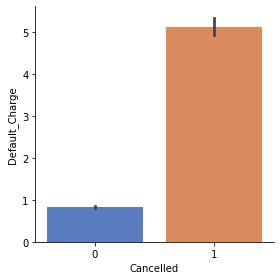

In [20]:
#catplot
sns.catplot("Cancelled", "Default_Charge", data=df, kind="bar", 
               height=4, aspect=1, palette="muted")

We can conclude that more default charges are cancelled

### 2. What is the relationship between APR and Cancellation? 

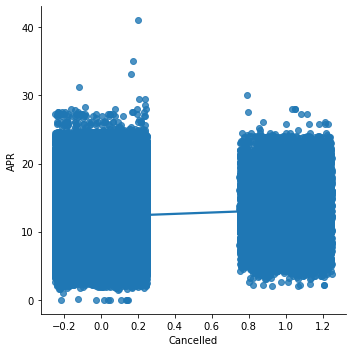

In [21]:
# lmplot graph
sns.lmplot("Cancelled", "APR", df, x_jitter=.25)

It is difficult to conclude the exact relationship of these two variables. At the bottom of the graph,it is apparant that more APR leads to more cancellation

### 3. Which Borrower Classification has the least canceled loans?

In [22]:
df.groupby('Borr_Classfication')['Cancelled'].sum().sort_values(ascending = False).head()

Borr_Classfication
General           3335
Services          2938
Transportation    2476
Real Estate       1800
Construction      1025
Name: Cancelled, dtype: int64

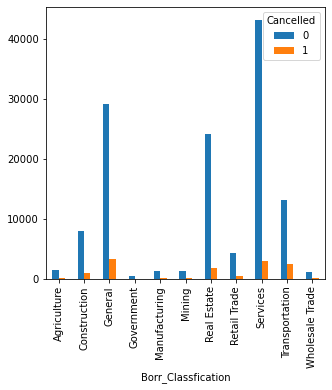

In [23]:
df.groupby(['Borr_Classfication', 'Cancelled']).size().unstack().plot.bar(figsize=(5,5))

The borrower classification services has the least cancelled loans.

### 4. Does NSF_charge have an effect on Cancellation of loans?

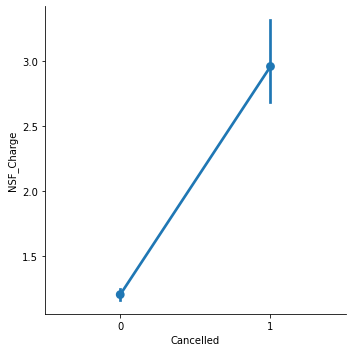

In [24]:
#catplot for Cancelled and NSF_Charge
sns.catplot("Cancelled","NSF_Charge",data=df,kind='point')

From the graph, we can conclude that increasing the NSF charge will increase the chances of loans being cancelled. 

### 5. What states have the highest cancelled loan?

In [25]:
#Group for State and Cancelled
state = df.groupby('Borrower_State')['Cancelled'].sum().sort_values(ascending = False).head()
state

Borrower_State
TX    5802
LA    3654
MS    1934
FL     184
GA     119
Name: Cancelled, dtype: int64

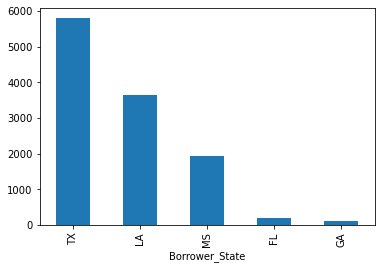

In [26]:
#Bar plot
state.plot(kind = 'bar')

Looking at the graph, borrowers from Texas have the highest cancelled loan.

### 6. How is Late_Charge related to Cancelled?

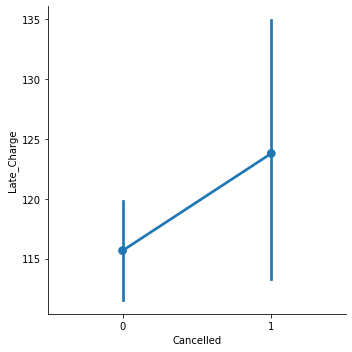

In [27]:
#catplot for Cancelled and Late_Charge
sns.catplot("Cancelled","Late_Charge",data=df,kind='point')

We can conclude from the graph that a higher Late_Charge leads to more cancellation.

### 7. Which Term has the highest Payment Received?

In [28]:
#Groupby for Term and Payment Recieved and Cancelled
Term = df.groupby('Payments_Rcvd')['Term'].sum().sort_values(ascending = False).head(13)
Term

Payments_Rcvd
10    604773
9     337511
11    124125
0      46935
8      37731
3      31464
7      30814
6      26509
5      23644
2      23475
4      23257
1      21046
12       180
Name: Term, dtype: int64

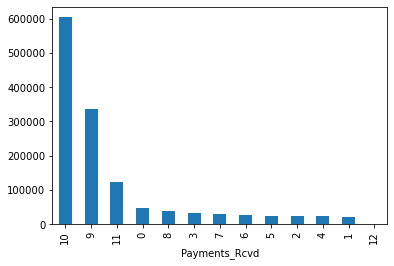

In [29]:
#Bar plot
Term.plot(kind = 'bar')

Term 9-11 have the highest payments received. Term 10 has the most number of payments received. 

### Exploratory Data Analysis

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140564 entries, 0 to 140573
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Cancelled              140564 non-null  int64  
 1   Default_Charge         140564 non-null  float64
 2   Late_Charge            140564 non-null  float64
 3   NSF_Charge             140564 non-null  float64
 4   Premium                140564 non-null  float64
 5   Down                   140564 non-null  float64
 6   AmtFin                 140564 non-null  float64
 7   FinChg                 140564 non-null  float64
 8   APR                    140564 non-null  float64
 9   Term                   140564 non-null  int64  
 10  Mature_Date            140564 non-null  object 
 11  Payments_Rcvd          140564 non-null  int64  
 12  Agent_ID               140564 non-null  int64  
 13  Borrower_ID            140564 non-null  int64  
 14  Borrower_State         140564 non-nu

In [31]:
#correlation
df.corr()

,Cancelled,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,AmtFin,FinChg,APR,Term,Payments_Rcvd,Agent_ID,Borrower_ID,Exposure,Borr_RegForCancelWarn
Cancelled,1.000000,0.208649,0.003208,0.055175,-0.021945,-0.017741,-0.021625,-0.025084,0.063316,-0.007650,-0.543643,-0.051702,0.142025,-0.013718,-0.092963
Default_Charge,0.208649,1.000000,0.034681,0.097181,-0.019587,-0.016532,-0.019114,-0.024733,0.082821,-0.009366,-0.091735,0.002929,0.038387,-0.011418,-0.038898
Late_Charge,0.003208,0.034681,1.000000,0.083831,0.292345,0.221038,0.292168,0.365598,-0.157950,0.031259,0.046398,-0.039230,-0.005050,0.157450,0.038063
NSF_Charge,0.055175,0.097181,0.083831,1.000000,0.005789,0.006306,0.005270,0.014428,-0.011232,0.014432,0.003673,-0.016569,0.049388,0.001124,0.012842
Premium,-0.021945,-0.019587,0.292345,0.005789,1.000000,0.801898,0.987135,0.933761,-0.237267,0.039530,0.047453,-0.050452,-0.020883,0.722927,0.005528
Down,-0.017741,-0.016532,0.221038,0.006306,0.801898,1.000000,0.696052,0.696843,-0.195015,0.007760,0.025025,-0.045392,-0.017321,0.333414,-0.000689
AmtFin,-0.021625,-0.019114,0.292168,0.005270,0.987135,0.696052,1.000000,0.935648,-0.232943,0.045428,0.050329,-0.048482,-0.020460,0.779540,0.006828
FinChg,-0.025084,-0.024733,0.365598,0.014428,0.933761,0.696843,0.935648,1.000000,-0.274551,0.072752,0.070259,-0.053743,-0.026038,0.657733,0.019184
APR,0.063316,0.082821,-0.157950,-0.011232,-0.237267,-0.195015,-0.232943,-0.274551,1.000000,-0.125455,-0.148418,0.179864,0.100466,-0.130222,-0.108379
Term,-0.007650,-0.009366,0.031259,0.014432,0.039530,0.007760,0.045428,0.072752,-0.125455,1.000000,0.481040,0.027064,-0.054030,0.037967,0.059142


In [32]:
#Finding correlation between X variables and Y variable
corr = pd.DataFrame(df.corr()['Cancelled'].drop('Cancelled'))
corr.sort_values(['Cancelled'], ascending = False)

,Cancelled
Default_Charge,0.208649
Borrower_ID,0.142025
APR,0.063316
NSF_Charge,0.055175
Late_Charge,0.003208
Term,-0.007650
Exposure,-0.013718
Down,-0.017741
AmtFin,-0.021625
Premium,-0.021945


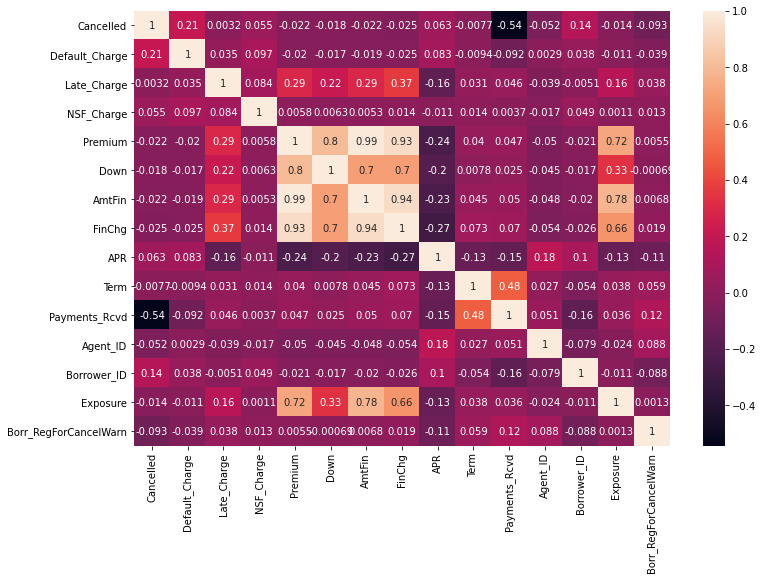

In [33]:
# correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

### What X variables appear to influence on “whether a loan is cancelled or not (1 or 0)”?

*Positively Correlated variables are*: 1. Default Charge 2. Borrower ID 3. APR 4. NSF_Charge 5. Agent_EnrolledInCreditProgram

*Negatively Correlated variables are*: 1. Payments_Rcvd 2. Borrower_RegisteredOnWeb 3. Borrower_RegisteredForCancellationWarning 4.Borrower_RegisteredForEForms 5. Borrower_EnrolledInEForms  

### Stastical Inference (Hypothesis Testing) Assume the data is normally distributed and perform t-testing.

In [34]:
import pingouin as pg 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import pandas as pd 
from IPython.display import Image 
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
import scipy.stats as stats

In [35]:
df.head(2)

,Cancelled,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,AmtFin,FinChg,APR,Term,Mature_Date,Payments_Rcvd,Agent_ID,Borrower_ID,Borrower_State,Agent_State,Exposure,Borr_RegForCancelWarn,Borr_Classfication,Borr_SubTerm
0,0,0.0,0.0,0.0,2078.00,737.0,1341.00,113.94,19.95,9,10/12/2015,9,1,3035397,CA,TX,0.00,1,Services,General Other
1,0,0.0,0.0,0.0,12033.18,3167.0,8866.18,438.52,10.65,10,11/16/2015,10,2,3018676,TX,TX,442.96,1,Real Estate,General Other


In [36]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
#Hypothesis1 - APR 
mod1 = ols('Cancelled ~ APR', data=df).fit()

aov_table = sm.stats.anova_lm(mod1)
print(aov_table)

                df        sum_sq    mean_sq           F         PR(>F)
APR            1.0     46.023634  46.023634  565.765473  8.277558e-125
Residual  140562.0  11434.374078   0.081348         NaN            NaN


In [37]:
#Tukey post-hocs 
pg.pairwise_tukey(data=df, dv='Cancelled', between='APR').head(2)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,0.0,0.1,0.0,0.0,0.0,0.297753,0.0,0.9,0.0
1,0.0,1.0,0.0,0.0,0.0,0.297753,0.0,0.9,0.0


The mean values are around the same so the difference can't really be seen here.

In [38]:
hyp1 = pg.anova(data=df, dv='Cancelled', between='APR', detailed=True)
hyp1

,Source,SS,DF,MS,F,p-unc,np2
0,APR,468.550034,2555,0.183386,2.298313,4.986093e-253,0.040813
1,Within,11011.847678,138008,0.079791,NaN,NaN,NaN


The p-value is less than 0.05 so we can reject the null hypothesis which shows that the APR variable doesn't have equal means.

In [39]:
#Hypothesis2 - NSF_Charge
mod2 = ols('Cancelled ~ NSF_Charge', data=df).fit()

aov_table = sm.stats.anova_lm(mod2)
print(aov_table)

                  df        sum_sq    mean_sq           F        PR(>F)
NSF_Charge       1.0     34.949155  34.949155  429.211936  3.350280e-95
Residual    140562.0  11445.448557   0.081426         NaN           NaN


In [40]:
#Tukey post-hocs 
pg.pairwise_tukey(data=df, dv='Cancelled', between='NSF_Charge').head(2)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,0.0,0.05,0.08552,0.0,0.08552,0.284615,0.300477,0.9,0.300476
1,0.0,0.24,0.08552,0.0,0.08552,0.284615,0.300477,0.9,0.300476


The mean values are not around the same so the difference can really be seen here.

In [41]:
hyp2 = pg.anova(data=df, dv='Cancelled', between='NSF_Charge', detailed=True)
hyp2

,Source,SS,DF,MS,F,p-unc,np2
0,NSF_Charge,112.997344,234,0.482895,5.961268,3.386236e-163,0.009843
1,Within,11367.400368,140329,0.081005,NaN,NaN,NaN


The p-value is less than 0.05 so we can reject the null hypothesis which shows that the NSF_Charge variable doesn't have equal means.

In [42]:
#Hypothesis3 - Default_Charge
mod3 = ols('Cancelled ~ Default_Charge', data=df).fit()

aov_table = sm.stats.anova_lm(mod3)
print(aov_table)

                      df        sum_sq     mean_sq            F  PR(>F)
Default_Charge       1.0    499.791968  499.791968  6397.803568     0.0
Residual        140562.0  10980.605744    0.078119          NaN     NaN


In [43]:
#Tukey post-hocs 
pg.pairwise_tukey(data=df, dv='Cancelled', between='Default_Charge').head(2)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,0.0,0.02,0.069325,0.5,-0.430675,0.192715,-2.234784,0.9,-1.580234
1,0.0,0.13,0.069325,0.0,0.069325,0.272538,0.254366,0.9,0.254366


The mean values are not around the same so the difference can really be seen here.

In [44]:
hyp3 = pg.anova(data=df, dv='Cancelled', between='Default_Charge', detailed=True)
hyp3

,Source,SS,DF,MS,F,p-unc,np2
0,Default_Charge,1070.674593,415,2.579939,34.734186,0.0,0.093261
1,Within,10409.723119,140148,0.074277,NaN,NaN,NaN


The p-value is less than 0.05 so we can reject the null hypothesis which shows that the Default_Charge variable doesn't have equal means.

## Modeling / Evaluation : Supervised ML model building (classification, regression)

### Classification

In [45]:
# Storing data into a different variable for modeling
df1 = df

In [46]:
df1.head()

,Cancelled,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,AmtFin,FinChg,APR,Term,Mature_Date,Payments_Rcvd,Agent_ID,Borrower_ID,Borrower_State,Agent_State,Exposure,Borr_RegForCancelWarn,Borr_Classfication,Borr_SubTerm
0,0,0.0,0.00,0.0,2078.00,737.00,1341.00,113.94,19.95,9,10/12/2015,9,1,3035397,CA,TX,0.00,1,Services,General Other
1,0,0.0,0.00,0.0,12033.18,3167.00,8866.18,438.52,10.65,10,11/16/2015,10,2,3018676,TX,TX,442.96,1,Real Estate,General Other
2,0,0.0,0.00,0.0,13650.94,3655.73,9995.21,652.49,14.00,10,11/22/2015,10,3,3082787,TX,TX,0.00,1,Transportation,Trucking
3,0,0.0,0.00,0.0,8782.00,2533.00,6249.00,383.55,14.50,9,10/27/2015,9,4,3063216,NC,TX,0.00,0,General,Personal DBA
4,0,0.0,25.45,30.0,1259.00,427.25,831.75,85.17,23.95,9,10/26/2015,9,5,3034473,TX,TX,0.00,1,Construction,General Construction


In [47]:
# declare X variables and y variable
y = df1['Cancelled']
X = df1[['Default_Charge','Late_Charge','NSF_Charge','Premium','Down','AmtFin','FinChg','APR','Term','Payments_Rcvd','Agent_ID','Exposure','Borrower_ID','Borr_RegForCancelWarn']]

print(X.shape, y.shape)

(140564, 14) (140564,)


### a) Decision Tree

In [48]:
#Split Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt

DecisionTreeClassifier()

In [49]:
#Model evaluation
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, dt.predict(X_test)))

0.9291676547308513
--------------------------------------------------------
[[36863  1447]
 [ 1540  2320]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     38310
           1       0.62      0.60      0.61      3860

    accuracy                           0.93     42170
   macro avg       0.79      0.78      0.78     42170
weighted avg       0.93      0.93      0.93     42170

--------------------------------------------------------
0.7816327262054983


In [50]:
# install scikit-plot

!pip install scikit-plot 

You should consider upgrading via the 'c:\users\gnana\documents\mis 665\python.exe -m pip install --upgrade pip' command.


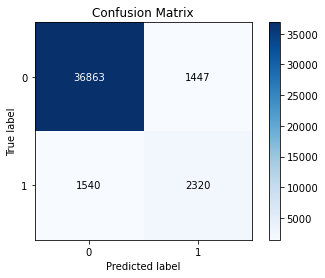

In [51]:
#Confusion Matrix
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

The model accuracy is around 92.9%. The True positive is 2320, the false positive is 1447, true negative is 36863 and false negative is 1540. The false positive data is loan that is not cancelled but are miclassified to be cancelled and the false negative loan that is cancelled but are misclassed to be not cancelled. 

### b) Knn

In [52]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, knn.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, knn.predict(X_test)))

0.8999762864595684
--------------------------------------------------------
[[37870   440]
 [ 3778    82]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     38310
           1       0.16      0.02      0.04      3860

    accuracy                           0.90     42170
   macro avg       0.53      0.50      0.49     42170
weighted avg       0.84      0.90      0.86     42170

--------------------------------------------------------
0.5048791357118029


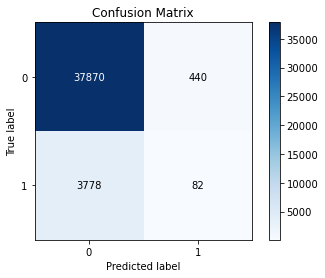

In [54]:
#Confusion Matrix 
skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=knn.predict(X_test))
plt.show()

The accuracy of the model is around 89.9%. The True positive is 82, the false positive is 440, true negative is 37870 and false negative is 3778. The false positive data (440) is loan that is not cancelled but are miclassified to be cancelled and the false negative (3778) loan that is cancelled but are misclassified to be not cancelled.  

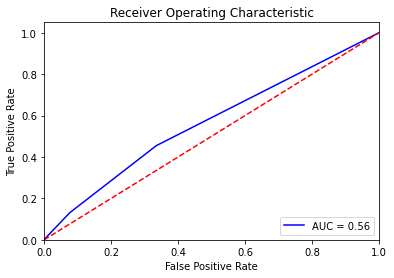

In [55]:
#Model Evaluation with ROC

preds = knn.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### c) Logistic regression

In [56]:
# evaluate the model by splitting into train and test sets and build a logistic regression model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression(solver='lbfgs', max_iter=500)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [57]:
# print coefficients
coef = pd.DataFrame(list(zip(X.columns, np.transpose(lr.coef_))), 
             columns=['X variables', 'coef']).sort_values('coef', ascending=False)

coef['coef'] = coef['coef'].str[0]
coef

,X variables,coef
1,Late_Charge,9.864451e-05
0,Default_Charge,1.229030e-05
2,NSF_Charge,5.136005e-06
7,APR,2.168283e-06
5,AmtFin,1.488724e-06
8,Term,-2.628789e-07
13,Borr_RegForCancelWarn,-4.238490e-07
12,Borrower_ID,-6.895569e-07
3,Premium,-2.150600e-06
4,Down,-3.639324e-06


In [58]:
#Model evaluation

print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))
print(metrics.roc_auc_score(y_test, lr.predict(X_test)))

0.9084657339340764
[[38310     0]
 [ 3860     0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     38310
           1       0.00      0.00      0.00      3860

    accuracy                           0.91     42170
   macro avg       0.45      0.50      0.48     42170
weighted avg       0.83      0.91      0.86     42170

0.5


In [59]:
# generate class probabilities
probs = lr.predict_proba(X_test)
print(probs)

[[0.91276682 0.08723318]
 [0.94548522 0.05451478]
 [0.89527001 0.10472999]
 ...
 [0.91341155 0.08658845]
 [0.90338126 0.09661874]
 [0.91279352 0.08720648]]


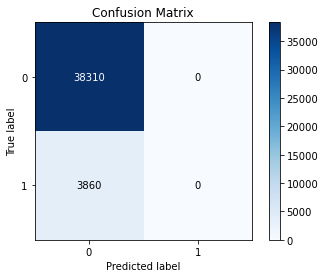

In [60]:
#Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=lr.predict(X_test))
plt.show()

The accuracy of the model is around 90.84%. The accuracy of this model is high and is very close to the pervious model. The True positive is 0, the false positive is 0, true negative is 38310 and false negative is 3860. The false positive data (0) is loan that is not cancelled but are miclassified to be cancelled and the false negative (3860) loan that is cancelled but are misclassified to be not cancelled. Also, getting false positive and true positive to be both 0 was new. 

### d) Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9400284562485179

In [62]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))

0.9400284562485179
[[37388   922]
 [ 1607  2253]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     38310
           1       0.71      0.58      0.64      3860

    accuracy                           0.94     42170
   macro avg       0.83      0.78      0.80     42170
weighted avg       0.94      0.94      0.94     42170



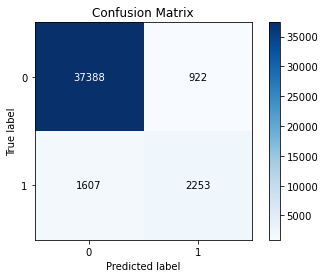

In [63]:
#Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=clf.predict(X_test))
plt.show()

The accuracy for this model is 93.9%. The Confusion Matrix gives the following information:
    1. True Positive = 2253
    2. False Positive = 922 (loan that is not cancelled but are miclassified to be cancelled)
    3. True Negative = 37388
    4. False Negative = 1607 (loan that is cancelled but are misclassified to be not cancelled)

## Feature selection in classification analysis. What variables are considered important in predicting why loan cancels before maturity date? 

### Recursive Feature Selection

In [64]:
# build logisticRegression
lr = LogisticRegression()
# selecting 3 highest ranking X variables
rfe = RFE(lr, 4)
rfe = rfe.fit(X, y)

In [65]:
# summarize the selection of the attributes
print((rfe.support_))
print((rfe.ranking_))

[False False False  True False False  True False False False False  True
  True False]
[ 5  3  6  1  8  9  1  7 11  4  2  1  1 10]


In [66]:
# Features sorted by their rank
pd.DataFrame({'feature':X.columns, 'importance':rfe.ranking_})


,feature,importance
0,Default_Charge,5
1,Late_Charge,3
2,NSF_Charge,6
3,Premium,1
4,Down,8
5,AmtFin,9
6,FinChg,1
7,APR,7
8,Term,11
9,Payments_Rcvd,4


In [67]:
#here I select 4 most significant features 
X_logistic = df1[['Premium', 'FinChg', 'Exposure', 'Borrower_ID']]
print(X_logistic.head())

    Premium  FinChg  Exposure  Borrower_ID
0   2078.00  113.94      0.00      3035397
1  12033.18  438.52    442.96      3018676
2  13650.94  652.49      0.00      3082787
3   8782.00  383.55      0.00      3063216
4   1259.00   85.17      0.00      3034473


The most important predictors are Premium, FinChg, Exposure and Borrower_ID.

### ExtraTreesClassifier

In [68]:
# build ExtraTreesClassifier
model_extra = ExtraTreesClassifier()
model_extra.fit(X, y)
model_extra.score(X, y)
# display the relative importance of each attribute
print((model_extra.feature_importances_))

[0.06226429 0.06367843 0.01283877 0.04735643 0.04909846 0.04759003
 0.04917926 0.05118126 0.08252081 0.36168931 0.05157049 0.04858268
 0.06398847 0.00846129]


In [69]:
print("Features sorted by their rank:")
print(sorted(zip([round(x, 4) for x in model_extra.feature_importances_], X.columns)))

Features sorted by their rank:
[(0.0085, 'Borr_RegForCancelWarn'), (0.0128, 'NSF_Charge'), (0.0474, 'Premium'), (0.0476, 'AmtFin'), (0.0486, 'Exposure'), (0.0491, 'Down'), (0.0492, 'FinChg'), (0.0512, 'APR'), (0.0516, 'Agent_ID'), (0.0623, 'Default_Charge'), (0.0637, 'Late_Charge'), (0.064, 'Borrower_ID'), (0.0825, 'Term'), (0.3617, 'Payments_Rcvd')]


In [70]:
pd.DataFrame(model_extra.feature_importances_, index = X.columns,
                                    columns=['Cancelled']).sort_values('Cancelled', ascending=False)

,Cancelled
Payments_Rcvd,0.361689
Term,0.082521
Borrower_ID,0.063988
Late_Charge,0.063678
Default_Charge,0.062264
Agent_ID,0.051570
APR,0.051181
FinChg,0.049179
Down,0.049098
Exposure,0.048583


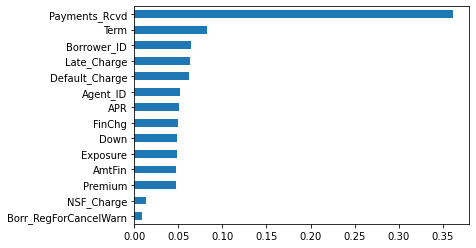

In [71]:
pd.DataFrame(model_extra.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=True).plot(kind='barh', 
                                                                                                            legend=None);

The important predictors are Payments_Rcvd, Term, Borrower_ID, Late_Charge, Default_Charge and APR.

## Model selection & Suggestions

###  What is the best model for this data?

My best model is the Random forest model because it has a high accuracy of 93.9% compared to the other models.

### What kind of additional data (X or independent variables) would you need to build a better classification model?

Another X or independent variable that would build a better classification model is by adding information about other reasons like promotation at work place bc an increase in salary can lead to cancelling loan and paying it off. 

### Any suggestions to build a better classification model?

To build a better classification model we can try to get rid of unnnecessary variables because these variables might make the analysis not as accurate or might make it ineffective. 

## Regression

In [72]:
df1.head(2)

,Cancelled,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,AmtFin,FinChg,APR,Term,Mature_Date,Payments_Rcvd,Agent_ID,Borrower_ID,Borrower_State,Agent_State,Exposure,Borr_RegForCancelWarn,Borr_Classfication,Borr_SubTerm
0,0,0.0,0.0,0.0,2078.00,737.0,1341.00,113.94,19.95,9,10/12/2015,9,1,3035397,CA,TX,0.00,1,Services,General Other
1,0,0.0,0.0,0.0,12033.18,3167.0,8866.18,438.52,10.65,10,11/16/2015,10,2,3018676,TX,TX,442.96,1,Real Estate,General Other


### Scikit-learn2

In [73]:
df1 = df1.drop('AmtFin', axis=1) 
df1.head(2)

,Cancelled,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,FinChg,APR,Term,Mature_Date,Payments_Rcvd,Agent_ID,Borrower_ID,Borrower_State,Agent_State,Exposure,Borr_RegForCancelWarn,Borr_Classfication,Borr_SubTerm
0,0,0.0,0.0,0.0,2078.00,737.0,113.94,19.95,9,10/12/2015,9,1,3035397,CA,TX,0.00,1,Services,General Other
1,0,0.0,0.0,0.0,12033.18,3167.0,438.52,10.65,10,11/16/2015,10,2,3018676,TX,TX,442.96,1,Real Estate,General Other


In [74]:
#assigning columns to X and Y variables
y = df1['Premium'] 
X = df1[['Default_Charge','Late_Charge','NSF_Charge','Down','FinChg','APR','Term','Payments_Rcvd','Agent_ID','Exposure','Borrower_ID','Borr_RegForCancelWarn']]

In [75]:
# building a multiple regression model below
model1 = lm.LinearRegression()
model1.fit(X, y)   
model1_y = model1.predict(X)

In [76]:
print('Coefficients: ', model1.coef_)
print("y-intercept ", model1.intercept_)

Coefficients:  [ 4.78034196e+01 -2.75548562e+00 -3.82096724e+01  1.60248322e+00
  3.44443375e+01  1.32993077e+02 -7.71102551e+02 -3.88349944e+01
 -1.75591177e-01  1.29859308e+00  1.12816740e-03 -6.48316117e+02]
y-intercept  -3047.0345136932483


In [77]:
pd.DataFrame(list(zip(X.columns, np.transpose(model1.coef_))))

,0,1
0,Default_Charge,47.803420
1,Late_Charge,-2.755486
2,NSF_Charge,-38.209672
3,Down,1.602483
4,FinChg,34.444338
5,APR,132.993077
6,Term,-771.102551
7,Payments_Rcvd,-38.834994
8,Agent_ID,-0.175591
9,Exposure,1.298593


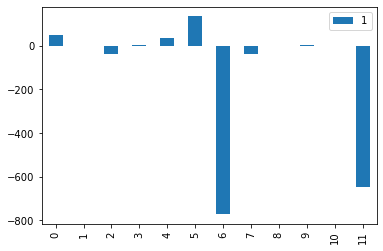

In [78]:
#Visualize Feature Importance
pd.DataFrame(list(zip(X.columns, np.transpose(model1.coef_)))).plot(kind='bar')

Top 3 variables with Scikit-learn 2 are: 
    1. AmtFin 
    2. Default_Charge
    3. Down

In [79]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('Default_Charge', '47.803'),
 ('Late_Charge', '-2.755'),
 ('NSF_Charge', '-38.210'),
 ('Down', '1.602'),
 ('FinChg', '34.444'),
 ('APR', '132.993'),
 ('Term', '-771.103'),
 ('Payments_Rcvd', '-38.835'),
 ('Agent_ID', '-0.176'),
 ('Exposure', '1.299'),
 ('Borrower_ID', '0.001'),
 ('Borr_RegForCancelWarn', '-648.316')]

In [80]:
print("mean square error: ", mean_squared_error(y, model1_y))
print("variance or r-squared: ", explained_variance_score(y, model1_y)) 

mean square error:  638385269.1961095
variance or r-squared:  0.9561700789876268


Using the Skit-learn model, regression results such as coefficients, mean square error and r-squared were found. The mean square error value is 638385269.19 and thr r-squared value is .96 or 96%. The r-squared value shows at what percent accuracy the model is predicted, hence this model is predicted at 96% accuracy. 

### Statsmodel

In [81]:
df1.head(2)

,Cancelled,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,FinChg,APR,Term,Mature_Date,Payments_Rcvd,Agent_ID,Borrower_ID,Borrower_State,Agent_State,Exposure,Borr_RegForCancelWarn,Borr_Classfication,Borr_SubTerm
0,0,0.0,0.0,0.0,2078.00,737.0,113.94,19.95,9,10/12/2015,9,1,3035397,CA,TX,0.00,1,Services,General Other
1,0,0.0,0.0,0.0,12033.18,3167.0,438.52,10.65,10,11/16/2015,10,2,3018676,TX,TX,442.96,1,Real Estate,General Other


In [82]:
#model with all varaiables
runs_reg_model = ols("Premium~Cancelled+Default_Charge+Late_Charge+NSF_Charge+Down+FinChg+APR+Term+Agent_ID+Payments_Rcvd+Borrower_ID+Exposure+Borr_RegForCancelWarn",df)
runs_reg = runs_reg_model.fit()
print(runs_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                Premium   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                 2.359e+05
Date:                Mon, 07 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:40:19   Log-Likelihood:            -1.6244e+06
No. Observations:              140564   AIC:                         3.249e+06
Df Residuals:                  140550   BIC:                         3.249e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -3363.94

In [83]:
runs_reg.mse_resid

638443936.0841568

In [84]:
runs_reg.params

Intercept               -3363.947873
Cancelled                -318.491796
Default_Charge             50.029305
Late_Charge                -2.753288
NSF_Charge                -37.855376
Down                        1.602466
FinChg                     34.444199
APR                       132.779482
Term                     -750.806472
Agent_ID                   -0.177949
Payments_Rcvd             -60.521910
Borrower_ID                 0.001239
Exposure                    1.298591
Borr_RegForCancelWarn    -652.638377
dtype: float64

Top 3 variables with Statsmodel are: 
    1. APR
    2. Default_Charge
    3. FinChg

Looking at the regression results, the r-squared value is .956 or 96% which is similar to the scikit model. Hence, both these models have the same accuracy. The mean error square value has increased in this model and that seems to be one of the difference between both models. This increase is normal because the MSE value from Statsmodels should be slightly higher than MSE value from sklearn because of the way they are calculated.  

In [85]:
# Choosing a smaller set of multiple variables as X
runs_reg_model2 = ols("Premium~Cancelled+Default_Charge+Late_Charge+NSF_Charge+Down+FinChg+APR+Term+Payments_Rcvd+Exposure",df)
runs_reg2 = runs_reg_model2.fit()
print(runs_reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                Premium   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                 3.066e+05
Date:                Mon, 07 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:40:19   Log-Likelihood:            -1.6244e+06
No. Observations:              140564   AIC:                         3.249e+06
Df Residuals:                  140553   BIC:                         3.249e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.9610    513.463      0.

In [86]:
runs_reg2.mse_resid

638541661.6339219

In [87]:
runs_reg2.params

Intercept           4.960957
Cancelled        -246.512057
Default_Charge     50.906613
Late_Charge        -2.761629
NSF_Charge        -37.905544
Down                1.602782
FinChg             34.443912
APR               134.304936
Term             -754.992873
Payments_Rcvd     -72.230720
Exposure            1.298726
dtype: float64

Top 3 variables with Statsmodel are: 
    1. APR
    2. Default_Charge
    3. FinChg

The smaller set of X variables chosen gave different regression values. For R-squared its 95.6% which is similar to the pervious model with a higher number of X variables. Only major change is that the MSE changed, it has increased because there is a lower number of X variables.

## Advanced regression techniques such as regularization and feature selection

### Regression model based on regularization

#### Lasso Model

In [88]:
#Fit the model 
model3 = linear_model.Lasso(alpha=1)              #higher alpha (penality parameter), fewer predictors
model3.fit(X, y)
model3_y = model3.predict(X)

In [89]:
print('Coefficients: ', model3.coef_)
print("y-intercept ", model3.intercept_)

Coefficients:  [ 4.77839093e+01 -2.75557930e+00 -3.82009947e+01  1.60248771e+00
  3.44442433e+01  1.33011792e+02 -7.70621003e+02 -3.89064953e+01
 -1.75885561e-01  1.29859580e+00  1.13325937e-03 -6.43335425e+02]
y-intercept  -3070.2601264030127


In [90]:
coef = ["%.3f" % i for i in model3.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('Default_Charge', '47.784'),
 ('Late_Charge', '-2.756'),
 ('NSF_Charge', '-38.201'),
 ('Down', '1.602'),
 ('FinChg', '34.444'),
 ('APR', '133.012'),
 ('Term', '-770.621'),
 ('Payments_Rcvd', '-38.906'),
 ('Agent_ID', '-0.176'),
 ('Exposure', '1.299'),
 ('Borrower_ID', '0.001'),
 ('Borr_RegForCancelWarn', '-643.335')]

In [91]:
pd.DataFrame(list(zip(X.columns, np.transpose(model3.coef_))))

,0,1
0,Default_Charge,47.783909
1,Late_Charge,-2.755579
2,NSF_Charge,-38.200995
3,Down,1.602488
4,FinChg,34.444243
5,APR,133.011792
6,Term,-770.621003
7,Payments_Rcvd,-38.906495
8,Agent_ID,-0.175886
9,Exposure,1.298596


In [92]:
print("mean square error: ", mean_squared_error(y, model3_y))
print("variance or r-squared: ", explained_variance_score(y, model3_y))

mean square error:  638385274.596028
variance or r-squared:  0.9561700786168821


This model has a high MSE and a high accuracy of 95.6% which is same as the previous models.

### Regression model based on Feature selection

In [93]:
#selecting only 2 X variables
X_new = SelectKBest(f_regression, k=2).fit_transform(X, y)
X_new

array([[  737.  ,   113.94],
       [ 3167.  ,   438.52],
       [ 3655.73,   652.49],
       ...,
       [14383.22,   673.11],
       [  874.33,   194.19],
       [  422.94,    87.99]])

In [94]:
# this helped find out which variables are selected
selector = SelectKBest(f_regression, k=2).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[3 4]


In [95]:
model4 = lm.LinearRegression()
model4.fit(X_new, y)
model4_y = model4.predict(X_new)

print("mean square error: ", mean_squared_error(y, model4_y))
print("variance or r-squared: ", explained_variance_score(y, model4_y))

mean square error:  1218220545.4453268
variance or r-squared:  0.9163600526845549


In [96]:
# use f_regression with k = 3 and develop a new regression model

X_new1 = SelectKBest(f_regression, k=3).fit_transform(X, y)
X_new1


model4 = lm.LinearRegression()
model4.fit(X_new1, y)
model4_y = model4.predict(X_new1)

print("mean square error: ", mean_squared_error(y, model4_y))
print("variance or r-squared: ", explained_variance_score(y, model4_y))

mean square error:  644212981.9174588
variance or r-squared:  0.9557699629439387


f_regression with K=2 had a higher MSE value and a lower accuracy compared to f_regression with k=3 so the f_regression with k=3 is a better model. K=3 accuracy is closer to the accuracy of the other models.

### RandormForestRegressor for Feature Selection

In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(n_estimators=100, random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

print("mean square error: ", mean_squared_error(y, regr_predicted))
print("variance or r-squared: ", explained_variance_score(y, regr_predicted))

mean square error:  65501795.67055993
variance or r-squared:  0.9955028470399637


In [98]:
sorted(zip(regr.feature_importances_, X.columns))

[(1.259713783997208e-05, 'NSF_Charge'),
 (1.636105171522878e-05, 'Default_Charge'),
 (0.00043855989710563895, 'Borr_RegForCancelWarn'),
 (0.0005839575949192946, 'Late_Charge'),
 (0.0008156279033483044, 'Payments_Rcvd'),
 (0.0008524754780070967, 'Term'),
 (0.002022633898559775, 'Borrower_ID'),
 (0.0027476967901895535, 'Agent_ID'),
 (0.029586592686469838, 'APR'),
 (0.08879701398239756, 'Exposure'),
 (0.1261816461009321, 'Down'),
 (0.7479448374785158, 'FinChg')]

In [99]:
feature_importances = pd.DataFrame(regr.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
FinChg,0.747945
Down,0.126182
Exposure,0.088797
APR,0.029587
Agent_ID,0.002748
Borrower_ID,0.002023
Term,0.000852
Payments_Rcvd,0.000816
Late_Charge,0.000584
Borr_RegForCancelWarn,0.000439


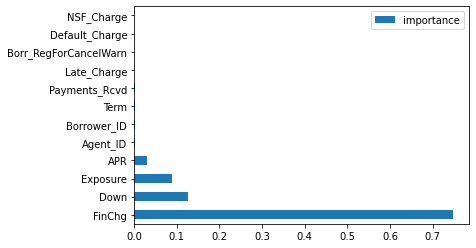

In [100]:
feature_importances.plot(kind='barh')

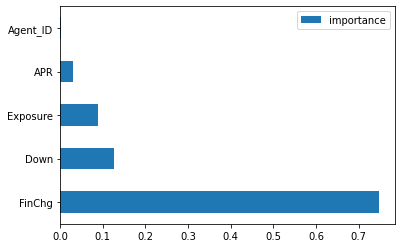

In [101]:
feature_importances.head().plot(kind='barh')

The top predictors for this section are:
    1. FinChg
    2. Down 
    3. Exposure 
    4. APR

## Best Model Selection 

### What is the best model? Explain the model. 

The best model was SciKit Learn since it has a lower MSE value compared to the other models and a high R-squared value making it a  good model hence Scikit learn was the best model. 

##  Clustering - Unsupervised ML

### Normalize data

In [102]:
#variance test
df1.var()

Cancelled                8.167439e-02
Default_Charge           3.459885e+01
Late_Charge              5.224489e+05
NSF_Charge               8.287339e+01
Premium                  1.456516e+10
Down                     7.223166e+08
FinChg                   3.289319e+06
APR                      2.055342e+01
Term                     2.075411e+00
Payments_Rcvd            8.072364e+00
Agent_ID                 5.089745e+05
Borrower_ID              1.192104e+09
Exposure                 6.163282e+08
Borr_RegForCancelWarn    2.032311e-01
dtype: float64

Data normalization is necessary because it transforms data samples so we can have a unit norm.

In [103]:
df4=df
df4.head(2)

,Cancelled,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,AmtFin,FinChg,APR,Term,Mature_Date,Payments_Rcvd,Agent_ID,Borrower_ID,Borrower_State,Agent_State,Exposure,Borr_RegForCancelWarn,Borr_Classfication,Borr_SubTerm
0,0,0.0,0.0,0.0,2078.00,737.0,1341.00,113.94,19.95,9,10/12/2015,9,1,3035397,CA,TX,0.00,1,Services,General Other
1,0,0.0,0.0,0.0,12033.18,3167.0,8866.18,438.52,10.65,10,11/16/2015,10,2,3018676,TX,TX,442.96,1,Real Estate,General Other


In [104]:
#dropping variables
df4 = df4.drop(['Borrower_State', 'Agent_State','Borr_Classfication','Borr_SubTerm','Mature_Date'], axis = 1)
df4.head(1)

,Cancelled,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,AmtFin,FinChg,APR,Term,Payments_Rcvd,Agent_ID,Borrower_ID,Exposure,Borr_RegForCancelWarn
0,0,0.0,0.0,0.0,2078.0,737.0,1341.0,113.94,19.95,9,9,1,3035397,0.0,1


In [105]:
#Dropping binary columns
df5 = df4.drop(['Cancelled', 'Borr_RegForCancelWarn'], axis = 1)
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140564 entries, 0 to 140573
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Default_Charge  140564 non-null  float64
 1   Late_Charge     140564 non-null  float64
 2   NSF_Charge      140564 non-null  float64
 3   Premium         140564 non-null  float64
 4   Down            140564 non-null  float64
 5   AmtFin          140564 non-null  float64
 6   FinChg          140564 non-null  float64
 7   APR             140564 non-null  float64
 8   Term            140564 non-null  int64  
 9   Payments_Rcvd   140564 non-null  int64  
 10  Agent_ID        140564 non-null  int64  
 11  Borrower_ID     140564 non-null  int64  
 12  Exposure        140564 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 20.0 MB


In [106]:
#http://stackoverflow.com/questions/12525722/normalize-data-in-pandas

df_norm = (df5 - df5.mean()) / (df5.max() - df5.min())
df_norm.head()

,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,AmtFin,FinChg,APR,Term,Payments_Rcvd,Agent_ID,Borrower_ID,Exposure
0,-0.001913,-0.001599,-0.001007,-0.001433,-0.001456,-0.001281,-0.002562,0.186574,-0.013662,0.023433,-0.098886,-0.288518,-0.000311
1,-0.001913,-0.001599,-0.001007,-0.000763,-0.000540,-0.000728,-0.000723,-0.040255,0.014909,0.065100,-0.098674,-0.412717,-0.000251
2,-0.001913,-0.001599,-0.001007,-0.000654,-0.000355,-0.000645,0.000490,0.041452,0.014909,0.065100,-0.098462,0.063484,-0.000311
3,-0.001913,-0.001599,-0.001007,-0.000982,-0.000779,-0.000920,-0.001034,0.053647,-0.013662,0.023433,-0.098250,-0.081885,-0.000311
4,-0.001913,-0.001249,0.021216,-0.001488,-0.001573,-0.001318,-0.002725,0.284135,-0.013662,0.023433,-0.098038,-0.295381,-0.000311


In [107]:
#checking variance again 
df_norm.var()

Default_Charge    0.000086
Late_Charge       0.000099
NSF_Charge        0.000045
Premium           0.000066
Down              0.000103
AmtFin            0.000054
FinChg            0.000106
APR               0.012227
Term              0.001694
Payments_Rcvd     0.014015
Agent_ID          0.022885
Borrower_ID       0.065770
Exposure          0.000012
dtype: float64

### Elbow Method

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

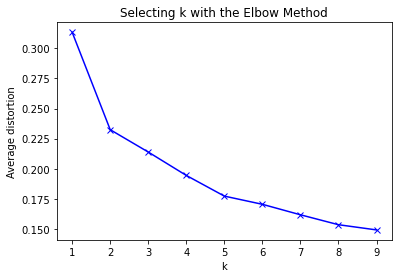

In [108]:
#The Elbow method

#https://www.packtpub.com/big-data-and-business-intelligence/mastering-machine-learning-scikit-learn#

#http://docs.scipy.org/doc/scipy/reference/spatial.distance.html
#Computes distance between each pair of the two collections of inputs
from scipy.spatial.distance import cdist 

K = list(range(1, 10)) 

meandistortions = []

for k in K: 
    kmeans = KMeans(n_clusters=k, random_state=1) 
    kmeans.fit(df_norm) 
    meandistortions.append(sum(np.min(cdist(df_norm, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df_norm.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method')

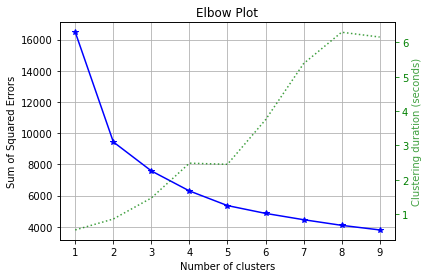

In [109]:
#using scikit-plot python package (https://github.com/reiinakano/scikit-plot) ... you need to install 
# !pip install scikit-plot

import scikitplot as skplt

kmeans = KMeans(random_state=1) 
skplt.cluster.plot_elbow_curve(kmeans, df_norm, cluster_ranges=list(range(1, 10)))

Around 3 or 4, we can see the elbow and turning into a linear form so we can choose 3 or 4 clusters for the clustering analysis. I chose 4 for this project.

### Clustering Analysis

In [110]:
# clustering analysis using k-means
k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)

In [111]:
k_means.fit(df_norm)

KMeans(n_clusters=4, random_state=0)

In [112]:
# cluster labels
k_means.labels_

array([1, 1, 3, ..., 0, 0, 0])

In [113]:
# find out cluster centers
k_means.cluster_centers_

array([[ 1.95619709e-03, -1.01230868e-03, -5.97300066e-05,
        -8.12246650e-04, -6.76561139e-04, -7.55259294e-04,
        -1.43420547e-03,  3.59232277e-02, -4.14883738e-02,
        -2.55237898e-01, -3.45726607e-02,  1.83835359e-01,
        -2.05355505e-04],
       [-5.09432598e-04,  2.38162656e-04, -3.59833238e-04,
         3.83133404e-04,  3.98507895e-04,  3.40801635e-04,
         6.01709456e-04, -2.02327662e-02,  3.05980440e-03,
         2.59212656e-02, -2.56016105e-02, -2.91260075e-01,
         8.14674472e-05],
       [ 1.18331330e-04, -1.06308607e-03, -2.43099408e-04,
        -1.07368999e-03, -1.19732429e-03, -9.39380540e-04,
        -1.52385479e-03,  7.19954339e-02,  7.16963951e-03,
         2.71333586e-02,  4.35946652e-01, -2.34321284e-02,
        -2.17222194e-04],
       [-1.76400508e-04,  2.73393707e-04,  3.24296861e-04,
         1.12099244e-04,  8.35173860e-05,  1.06152806e-04,
         1.93145391e-04, -6.49670856e-03,  7.94018552e-03,
         4.63198525e-02, -4.23997923e

In [114]:
# convert cluster lables to dataframe
df6 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df6.head()

,cluster
0,1
1,1
2,3
3,1
4,1


In [115]:
df5 = df5.reset_index(drop=True)
df6 = df6.reset_index(drop=True)

# join df_norm & df6
df7 = df5.join(df6)
df7.head()

,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,AmtFin,FinChg,APR,Term,Payments_Rcvd,Agent_ID,Borrower_ID,Exposure,cluster
0,0.0,0.00,0.0,2078.00,737.00,1341.00,113.94,19.95,9,9,1,3035397,0.00,1
1,0.0,0.00,0.0,12033.18,3167.00,8866.18,438.52,10.65,10,10,2,3018676,442.96,1
2,0.0,0.00,0.0,13650.94,3655.73,9995.21,652.49,14.00,10,10,3,3082787,0.00,3
3,0.0,0.00,0.0,8782.00,2533.00,6249.00,383.55,14.50,9,9,4,3063216,0.00,1
4,0.0,25.45,30.0,1259.00,427.25,831.75,85.17,23.95,9,9,5,3034473,0.00,1


## Interpretation of Clustering Analysis

### How many observations are there in cluster 1-4?

In [116]:
df7.groupby(['cluster']).size()

cluster
0    17677
1    48021
2    10471
3    64395
dtype: int64

### The mean values of each cluster in terms of different variables

In [117]:
#means values for each cluster
df7.groupby(['cluster']).mean()

,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,AmtFin,FinChg,APR,Term,Payments_Rcvd,Agent_ID,Borrower_ID,Exposure
cluster,,,,,,,,,,,,,
0,2.459468,42.697243,1.278114,11301.280776,2803.732409,8497.548367,312.918400,13.773431,8.026192,2.312044,304.367144,3.098989e+06,774.434949
1,0.891904,133.720773,0.872920,29074.732799,5652.899135,23421.833664,672.191445,11.470974,9.585348,9.059870,346.730576,3.035031e+06,2872.992668
2,1.292750,39.018358,1.031918,7418.500990,1424.472389,5994.028602,297.245845,15.253179,9.729061,9.088435,2524.642346,3.071082e+06,688.076316
3,1.103680,136.281831,1.796484,25042.840240,4818.044158,20224.796082,600.012214,12.034578,9.756037,9.549251,267.506390,3.097199e+06,2502.966742


### What is the profile of each cluster?

The cluster will analyzed with from lowest -> low -> high -> highest: 
    
Cluster 0: Default_Charge(highest), Late_Charge(low),NSF_Charge(high),Premium(low),Down(low),AmtFin(low), FinChg(low), APR(high),Term(lowest), Payment_Rcvd(lowest), Agent_ID(low), Borrower_ID(highest) and Exposure(low) 

Cluster 1:  Default_Charge(lowest), Late_Charge(high),NSF_Charge(lowest),Premium(highest),Down(highest),AmtFin(highest), FinChg(highest), APR(lowest),Term(low), Payment_Rcvd(low), Agent_ID(high), Borrower_ID(lowest) and Exposure(highest) 

Cluster 2: Default_Charge(high), Late_Charge(lowest),NSF_Charge(low),Premium(lowest),Down(lowest),AmtFin(lowest), FinChg(lowest), APR(highest),Term(high), Payment_Rcvd(high), Agent_ID(highest), Borrower_ID(high) and Exposure(lowest) 

Cluster 3: Default_Charge(low), Late_Charge(highest),NSF_Charge(highest),Premium(high),Down(high),AmtFin(high), FinChg(high), APR(low),Term(hihest), Payment_Rcvd(highest), Agent_ID(lowest), Borrower_ID(highest) and Exposure(high) 

### Analyzing the mean for each cluster 

In [118]:
#mean values for each cluster - Default_Charge
df7.groupby('cluster')['Default_Charge'].mean()

cluster
0    2.459468
1    0.891904
2    1.292750
3    1.103680
Name: Default_Charge, dtype: float64

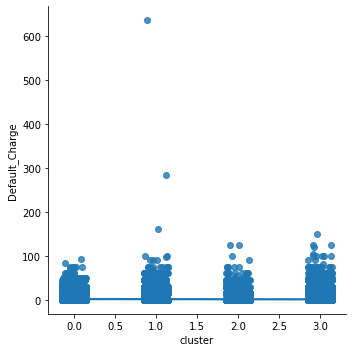

In [119]:
#visualizing the results
sns.lmplot("cluster", "Default_Charge", df7, x_jitter=.15, y_jitter=.15)

In [120]:
#mean values for each cluster - NSF_Charge
df7.groupby('cluster')['NSF_Charge'].mean()

cluster
0    1.278114
1    0.872920
2    1.031918
3    1.796484
Name: NSF_Charge, dtype: float64

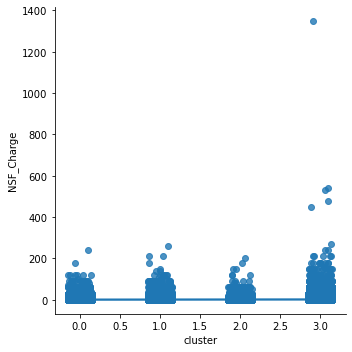

In [121]:
#visualizing the results
sns.lmplot("cluster", "NSF_Charge", df7, x_jitter=.15, y_jitter=.15)

In [122]:
#mean values for each cluster - APR
df7.groupby('cluster')['APR'].mean()

cluster
0    13.773431
1    11.470974
2    15.253179
3    12.034578
Name: APR, dtype: float64

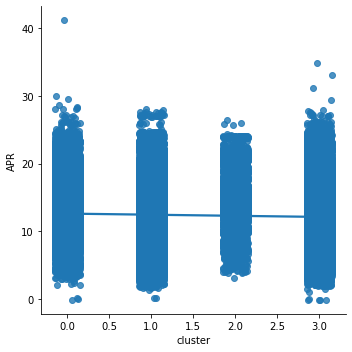

In [123]:
#visualizing the results
sns.lmplot("cluster", "APR", df7, x_jitter=.15, y_jitter=.15)

## Build Decision Tree model w/ Original Data

In [124]:
# set X and y
y = df7['cluster'].values
X = df7.drop(['cluster'], axis=1)
X.head()

,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,AmtFin,FinChg,APR,Term,Payments_Rcvd,Agent_ID,Borrower_ID,Exposure
0,0.0,0.00,0.0,2078.00,737.00,1341.00,113.94,19.95,9,9,1,3035397,0.00
1,0.0,0.00,0.0,12033.18,3167.00,8866.18,438.52,10.65,10,10,2,3018676,442.96
2,0.0,0.00,0.0,13650.94,3655.73,9995.21,652.49,14.00,10,10,3,3082787,0.00
3,0.0,0.00,0.0,8782.00,2533.00,6249.00,383.55,14.50,9,9,4,3063216,0.00
4,0.0,25.45,30.0,1259.00,427.25,831.75,85.17,23.95,9,9,5,3034473,0.00


In [125]:
# instantiate a decision tree model, and fit with X and y
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

model = model.fit(X, y)    # without model validation since this model is not for prediction, but for explanation

# check the accuracy on the training set
model.score(X, y)

0.9685339062633391

In [126]:
predicted_Y = model.predict(X)
print(predicted_Y)

[1 1 3 ... 0 0 0]


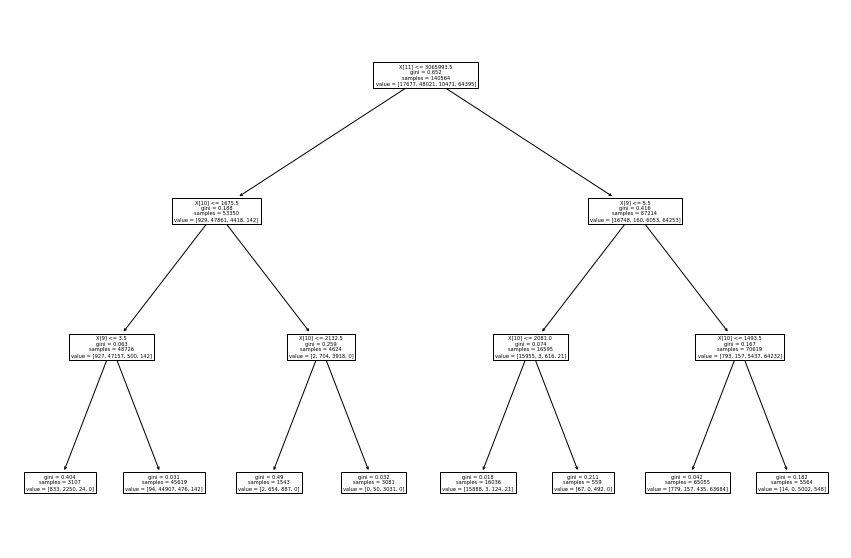

In [127]:
plt.figure(figsize=(15,10))
tree.plot_tree(model);

## Plot tree with ```tree.plot_tree```

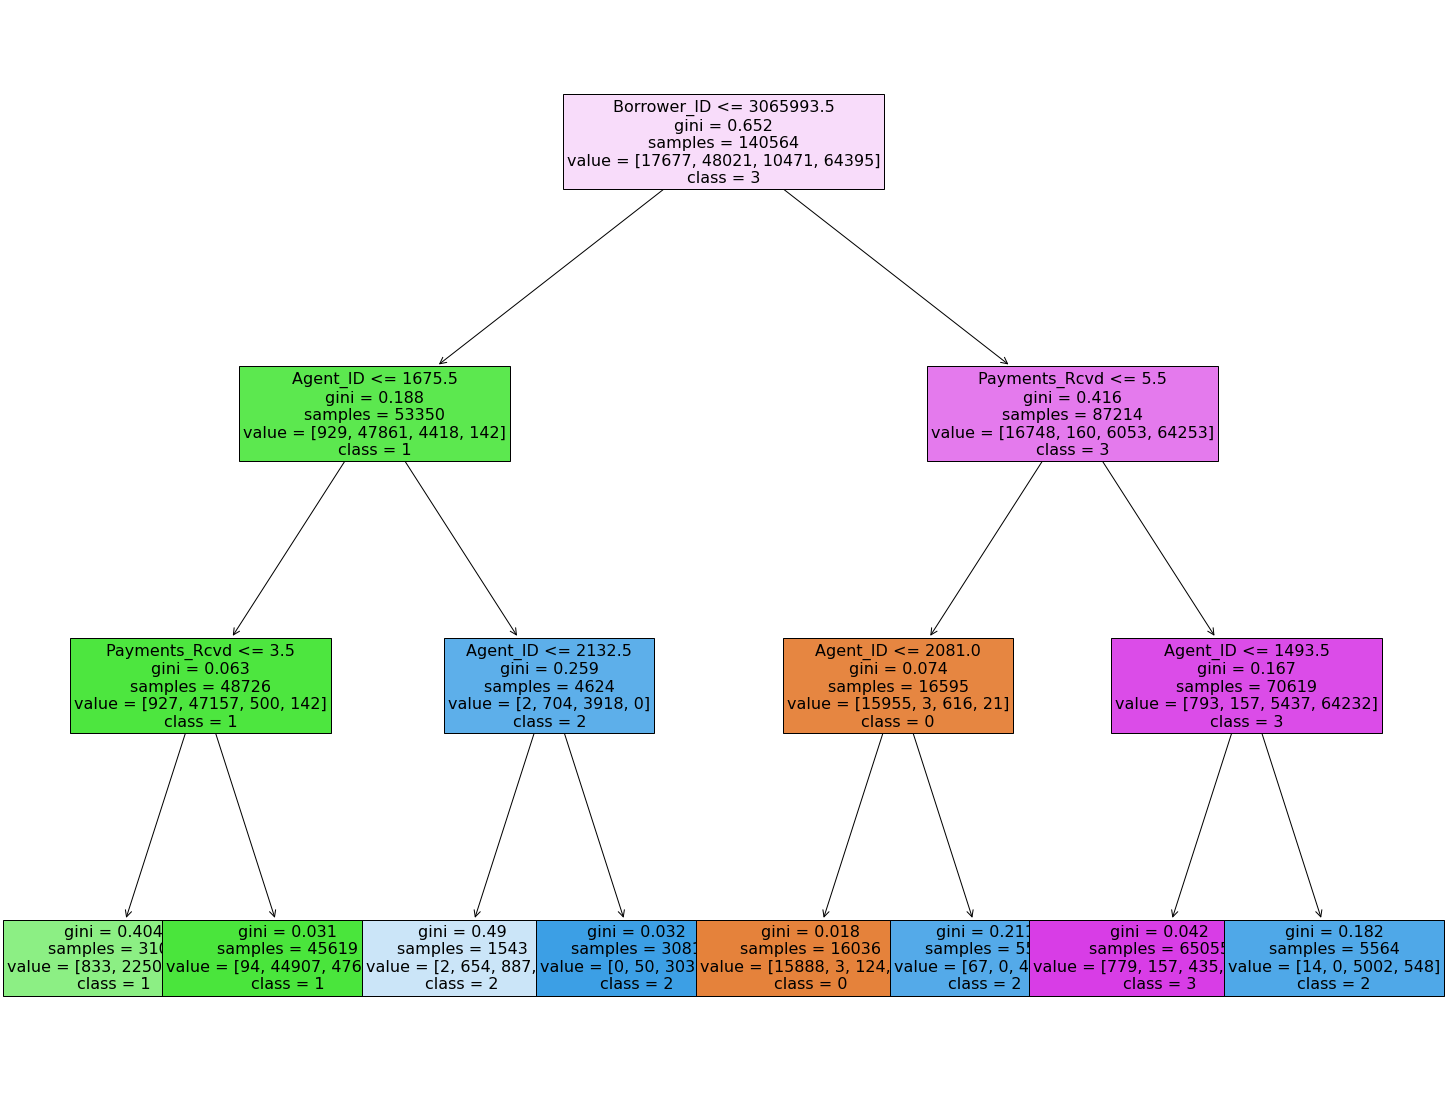

In [128]:
#plot tree
plt.figure(figsize=(25,20))
tree.plot_tree(model,
               feature_names = X.columns, 
               class_names=['0','1','2','3'],
               fontsize=16,
               filled = True);

In [129]:
#text representation of the plot tree
text_representation = tree.export_text(model, feature_names=(list(X.columns)))
print(text_representation)

|--- Borrower_ID <= 3065993.50
|   |--- Agent_ID <= 1675.50
|   |   |--- Payments_Rcvd <= 3.50
|   |   |   |--- class: 1
|   |   |--- Payments_Rcvd >  3.50
|   |   |   |--- class: 1
|   |--- Agent_ID >  1675.50
|   |   |--- Agent_ID <= 2132.50
|   |   |   |--- class: 2
|   |   |--- Agent_ID >  2132.50
|   |   |   |--- class: 2
|--- Borrower_ID >  3065993.50
|   |--- Payments_Rcvd <= 5.50
|   |   |--- Agent_ID <= 2081.00
|   |   |   |--- class: 0
|   |   |--- Agent_ID >  2081.00
|   |   |   |--- class: 2
|   |--- Payments_Rcvd >  5.50
|   |   |--- Agent_ID <= 1493.50
|   |   |   |--- class: 3
|   |   |--- Agent_ID >  1493.50
|   |   |   |--- class: 2



## Build randomforestclassifier model for feature importance 

In [130]:
# build randomforeastmodel
clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X, y)
clf.score(X,y)

0.9999715432116332

In [131]:
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_})

,feature,importance
0,Default_Charge,0.001755
1,Late_Charge,0.003753
2,NSF_Charge,0.000563
3,Premium,0.007123
4,Down,0.008442
5,AmtFin,0.006900
6,FinChg,0.006547
7,APR,0.011747
8,Term,0.022937
9,Payments_Rcvd,0.210868


### Which variables are considered most important in this clustering analysis?

Borrowe_ID, Payments_Rcvd, Agent_ID, Term and APR

## Storytelling

Working as a Data Scientist for a Premium Financing
company, I was assigned to a project  to get a better understanding why a loan cancels before its maturity date. To understand the data, I prepared the data for better business and data understanding and I did this through data processing, and asking important questions to figure out which variables were necessary in the data set and which data can be removed. 

Once these key steps were done, I need to find the answer to the main question which is why loans cancel before maturity date. To find the answer to this question, I used these models and alogorithm: 
1. Classification. 
2. Regression models.
3. Clustering algorithm. 

Classification and Regression are Supervised ML model building used to analyze the data: 

CLASSIFICATION - 

Classification is finding liner or nonliner function, which separates different classes (e.g., yes/no) in y value. The goal of the classification model for this data set is to predict the Cancelled variable which is the variable that measures whether a loan cancels before maturity date or not. We're using different models to predict this and here are the different models used: 
1. Decision Tree - The model accuracy is around 92.9%. 
*Confusion Matrix - The True positive is 2322, the false positive is 1433, true negative is 36877 and false negative is 1538. The false positive data is loan that is not cancelled but are miclassified to be cancelled and the false negative loan that is cancelled but are misclassified to be not cancelled. 
2. KNN - The accuracy of the model is around 89.9%. 
*Confusion Matrix - The True positive is 82, the false positive is 440, true negative is 37870 and false negative is 3778. The false positive data (440) is loan that is not cancelled but are miclassified to be cancelled and the false negative (3778) loan that is cancelled but are misclassified to be not cancelled.  
3. Logistic Regression - The accuracy of the model is around 90.84%.
*Confusion Matrix - The accuracy of this model is high and is very close to the pervious model. The True positive is 0, the false positive is 0, true negative is 38310 and false negative is 3860. The false positive data (0) is loan that is not cancelled but are miclassified to be cancelled and the false negative (3860) loan that is cancelled but are misclassified to be not cancelled.
4. Random Forest Classifier - The accuracy for this model is 93.9%.
*Confusion Matrix -  The True Positive = 2190, False Positive = 876 (loan that is not cancelled but are miclassified to be cancelled), True Negative = 37434 and False Negative = 1670 (loan that is cancelled but are misclassified to be not cancelled)

Next, we used two Feature Selection to see which were the best predictors for the y-value:
1. Recursive Feature Selection - Most important predictors for this feature selection Premium, FinChg, Exposure & Borrower_ID.
2. ExtraTreesClassifier - Important predictors are Payments_Rcvd, Term, Borrower_ID, Late_Charge, Default_Charge and APR.

My best model is the *Random Forest Classifier* model because it has a high accuracy of 93.9% compared to the other models. Best predictors for classification models are, Paymet_Rcvd, Borrower_ID, Late_Charge, Default_Charge and APR. 

REGRESSION - 

Regression is finding liner or nonliner function that fits well with the dataset. The goal of the regression model is to predict how Premuim will best fit with the rest of the dataset. To predict that, we are using different models such as: 
1. Scikit-learn 2 - the r-squared value is .96 or 96% MSE value lower than Statsmodel. 
2. Statsmodel - the r-squared value is .956 or 96%. High MSE value.

Advanced regression techniques such as regularization and feature selection
1. Regression model based on regularization (Lasso Model) - Accuracy of 96%
2. Regression model based on Feature selection - K=3 (Accuracy was 95.57%) and K=2 (Accuracy was 91.6%)

Feature Selection
1. RandormForestRegressor for Feature Selection - The top predictors are FinChg, Down, Exposure and APR

The best model was *SciKit Learn* since it has a lower MSE value compared to the other models and a high R-squared value making it a  good model hence Scikit learn was the best model. Also, the best Predictors from regression models were FinChg, Down, Exposure and APR.

Clustering was an Unsupervised ML modeling building used to analyze data: 

CLUSTERING - 

Clustering is used to group unlabeled data. First, we normalized the data so all the variables have the same impact. Then the Elbow Method suggest In this data, we have grouped the data into 4 clusters, we found this number using the elbow method, to understand the characeteristics of the borrowers. Hence, we are using the K-Means cluster to get this information. 
1. K-Means Clustering - 0 - 17677 1 - 48021 2 - 10471 3 - 64395 observations in each cluster

Build model for feature importance:
1. Randomforestclassifier - Best predictors were Borrower_ID, Payments_Rcvd, Agent_ID, Term and APR.

In conclusion, to understand why the loan cancels Random Forest Classifier is the best model because it has a high accuracy value. The variables that influence early cancellation based on the classification models are Paymet_Rcvd, Borrower_ID, Late_Charge, Default_Charge and APR so our company needs to be focused on these numbers when looking at loan cancellation. As for regression model, Scikit Learn 2 model is th best because of the high accuracy value and low MSE value compared to the other models.The variables that are associated with Premium are AmtFin, Default_Charge, Down. Using clustering, we grouped cancelled loans into 4 groups and this helped us understand the characteristics of the borrowers in each group. 





In [132]:
!pip install RISE

You should consider upgrading via the 'c:\users\gnana\documents\mis 665\python.exe -m pip install --upgrade pip' command.
